In [69]:
#april 25
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from glob import glob
from itertools import cycle

In [88]:
class LightCurve:
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None, name=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        self.name = name 

    def plot(self, color=None): #, linestyle=None, linewidth=None, label=None, ax=None):
        """ Plot the light curve"""
        plt.errorbar(self.times, self.fluxes, self.uncertainties, fmt='.',
                     color=color) #, linestyle=linestyle, linewidth=linewidth, #label=self.name)
        plt.xlabel('Time', fontsize=16)
        plt.ylabel('Flux', fontsize=16)
        plt.legend()
        #plt.title(self.name)

    @classmethod
    def from_txt(cls, path):
        data =np.loadtxt(path)

        times = data[0, :]
        fluxes = data[1, :]
        uncertainties = data[2, :]
        flags = data[3, :]
        
        return cls(times=times, fluxes=fluxes, uncertainties=uncertainties, flags=flags)

    def clean(self, order=1):
        poly_params = np.polyfit(self.times, self.fluxes, order)
        best_fit_model = np.polyval(poly_params, self.times)

        self.fluxes /= best_fit_model #same as self.fluxes = self.fluxse/ best_fit_model
        self.uncertainties /= best_fit_model

        self.cleaned = True
        

In [89]:
%run generate_lcs.py

<Figure size 640x480 with 0 Axes>

In [79]:
#path = 'sample_lcs/lc_2.txt'
#lc2 = LightCurve.from_txt(path)
#lc2.name= 'LC-2'
#lc2.plot(label =lc2.name)

9.611409529715507
9.783605109474182
9.689314392011651
8.430965369977178
10.717714188943033
10.629042082885132
12.572633348149365
10.138972401449749
10.152946430097272
11.171717022440726


/tmp/ipykernel_5704/1042100051.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


True

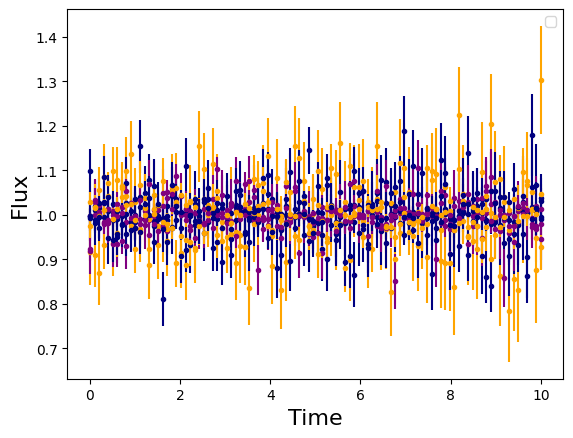

In [91]:
lc_paths = glob('sample_lcs/*.txt')
lightcurves = [LightCurve.from_txt(path) for path in lc_paths]
c = cycle(['navy', 'purple', 'orange'])
ls = cycle

for lightcurve in lightcurves: 
    
    print(lightcurve.fluxes.mean())
    lightcurve.clean()
    lightcurve.plot(next(c))
    
lightcurves[0].cleaned

In [ ]:
times = np.linspace(0, 10, 100)
sigma = 0.01
fluxes = 1 +sigma * np.random.randn(len(times))
uncertainties = sigma * np.ones_like(fluxes)
flags = np.random.randint(0, 5, len(fluxes))
name = 'proxima Centauri'

times2= np.linspace(0, 10, 100)
sigma2 = 0.05
fluxes2 = 1 +sigma * np.random.randn(len(times))
uncertainties2 = sigma * np.ones_like(fluxes)
flags2 = np.random.randint(0, 5, len(fluxes))
name2 = 'alpha CentauriA'


prox_cen = LightCurve(times=times, fluxes=fluxes,
                     uncertainties=uncertainties, flags=flags,
                     name=name)
cen_A = LightCurve(times=times2, fluxes=fluxes2,
                     uncertainties=uncertainties2, flags=flags2,
                     name=name2)
fig=plt.figure(figsize=(15,10))
ax1 = plt.subplot(211)
prox_cen.plot('navy', '-', 0.7, name, ax1)
ax2 = plt.subplot(212)
cen_A.plot('red', '-', 0.7, name2, ax2)
plt.savefig('light_curve.png')

In [44]:
new_light_curve = LightCurve(times=times, fluxes=fluxes, uncertainties=uncertainties, flags=flags)